Importing all the necessary libraries and loading data

In [1]:

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression



In [2]:
youth_data = pd.read_csv('/Users/nidhitrivedi/Downloads/youth_data.csv')

In [3]:
#to view sample data
youth_data.head()

,iralcfy,irmjfy,ircigfm,IRSMKLSS30N,iralcfm,irmjfm,ircigage,irsmklsstry,iralcage,irmjage,...,eduschlgo,EDUSCHGRD2,eduskpcom,imother,ifather,income,govtprog,POVERTY3,PDEN10,COUTYP4
0,993,991,91,91,93.0,91.0,991,991,12,991,...,1,5,0,1,1,4,2,3,2,2
1,991,991,91,91,91.0,91.0,991,991,991,991,...,1,5,0,1,1,4,2,3,1,1
2,993,993,93,91,93.0,93.0,13,991,13,13,...,1,4,0,1,1,4,1,3,1,1
3,991,991,91,91,91.0,91.0,991,991,991,991,...,1,7,0,1,1,2,2,1,2,2
4,991,991,91,91,91.0,91.0,991,991,991,991,...,1,3,0,1,1,4,2,3,2,2


In [4]:
youth_data.shape

(5500, 79)

In [5]:
youth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 79 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iralcfy      5500 non-null   int64  
 1   irmjfy       5500 non-null   int64  
 2   ircigfm      5500 non-null   int64  
 3   IRSMKLSS30N  5500 non-null   int64  
 4   iralcfm      5500 non-null   float64
 5   irmjfm       5500 non-null   float64
 6   ircigage     5500 non-null   int64  
 7   irsmklsstry  5500 non-null   int64  
 8   iralcage     5500 non-null   int64  
 9   irmjage      5500 non-null   int64  
 10  mrjflag      5500 non-null   int64  
 11  alcflag      5500 non-null   int64  
 12  tobflag      5500 non-null   int64  
 13  alcydays     5500 non-null   int64  
 14  mrjydays     5500 non-null   int64  
 15  alcmdays     5500 non-null   int64  
 16  mrjmdays     5500 non-null   int64  
 17  cigmdays     5500 non-null   int64  
 18  smklsmdays   5500 non-null   int64  
 19  schfel

First, let's check the data for any missing values. Then, we'll get remove those missing values because they won't help us analyze the data.

In [6]:
null_values = youth_data.isnull().sum()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
null_values

iralcfy          0
irmjfy           0
ircigfm          0
IRSMKLSS30N      0
iralcfm          0
irmjfm           0
ircigage         0
irsmklsstry      0
iralcage         0
irmjage          0
mrjflag          0
alcflag          0
tobflag          0
alcydays         0
mrjydays         0
alcmdays         0
mrjmdays         0
cigmdays         0
smklsmdays       0
schfelt          0
tchgjob         16
avggrade       353
stndscig       253
stndsmj        259
stndalc        242
stnddnk        298
parchkhw        19
parhlphw        38
PRCHORE2        18
PRLMTTV2        42
parlmtsn       132
PRGDJOB2        22
PRPROUD2        21
argupar         87
YOFIGHT2        23
YOGRPFT2        29
YOHGUN2         23
YOSELL2         15
YOSTOLE2        13
YOATTAK2        13
PRPKCIG2        57
PRMJEVR2        60
prmjmo          69
PRALDLY2        55
YFLPKCG2        52
YFLTMRJ2        55
yflmjmo         53
YFLADLY2        52
FRDPCIG2        87
FRDMEVR2        84
frdmjmon        89
FRDADLY2        80
talkprob    

In [7]:

youth_data = youth_data.dropna()

In [8]:
null_values = youth_data.isnull().sum()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

null_values

iralcfy        0
irmjfy         0
ircigfm        0
IRSMKLSS30N    0
iralcfm        0
irmjfm         0
ircigage       0
irsmklsstry    0
iralcage       0
irmjage        0
mrjflag        0
alcflag        0
tobflag        0
alcydays       0
mrjydays       0
alcmdays       0
mrjmdays       0
cigmdays       0
smklsmdays     0
schfelt        0
tchgjob        0
avggrade       0
stndscig       0
stndsmj        0
stndalc        0
stnddnk        0
parchkhw       0
parhlphw       0
PRCHORE2       0
PRLMTTV2       0
parlmtsn       0
PRGDJOB2       0
PRPROUD2       0
argupar        0
YOFIGHT2       0
YOGRPFT2       0
YOHGUN2        0
YOSELL2        0
YOSTOLE2       0
YOATTAK2       0
PRPKCIG2       0
PRMJEVR2       0
prmjmo         0
PRALDLY2       0
YFLPKCG2       0
YFLTMRJ2       0
yflmjmo        0
YFLADLY2       0
FRDPCIG2       0
FRDMEVR2       0
frdmjmon       0
FRDADLY2       0
talkprob       0
PRTALK3        0
PRBSOLV2       0
PREVIOL2       0
PRVDRGO2       0
GRPCNSL2       0
PREGPGM2      

As our key variable for binary classification is 'alcflag' it's essential to examine its value distribution to check the number of entries classified as 1 and 0.

In [9]:
youth_data['alcflag'].value_counts()

0    3114
1    1155
Name: alcflag, dtype: int64

[0 1] [3114 1155]


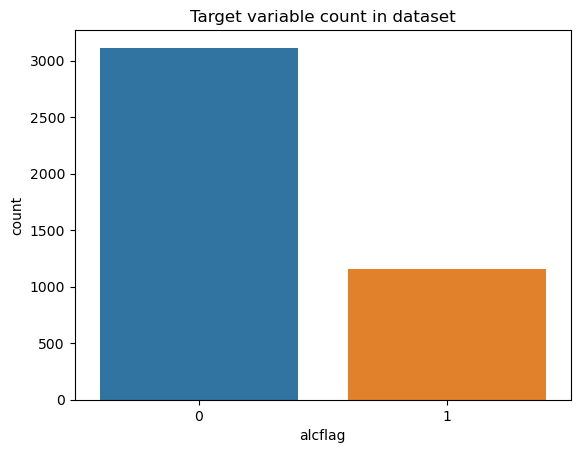

In [10]:
(distinct, counts) = np.unique(youth_data['alcflag'], return_counts=True)
print(distinct, counts)
sns.barplot(x=distinct, y=counts)
plt.xlabel("alcflag")
plt.ylabel("count")
plt.xticks()
plt.title("Target variable count in dataset")
plt.show()

Below code is just to verify if there are any nulls in alcflag.

In [11]:
null_count = youth_data['alcflag'].isnull().sum()
print("Number of null values in 'alcflag' column:", null_count)


Number of null values in 'alcflag' column: 0


We'll examine each feature to identify the unique values it contains and categorize them based on our needs.

In [12]:

for column_name in youth_data.columns:
    print(f"Column: {column_name}")
    print(youth_data[column_name].unique())


Column: iralcfy
[993 991  12   1 156   2  36   8  60  52   4 132  24 120   7   5   3 180
  13  43   6 104  96  15  48  69  25  57  14  18  10  28  20  46   9  40
  22  39  72  84 260  30 100  19 343  26 144 240 145 204 276  61  45  33
  37  32  11  23  47 108 107  29  54  75 250 208  58  21 216  50  41  59
  34 181  16  35  27  42  82]
Column: irmjfy
[991 993 228   3 329   4   2  36 312  15 208   1  12  30  72   7  52 120
 260  59  16  18  96  50 168 360 156  20  73 100 364  27  17  48   5   9
 183 252   6   8 150 142  23  51  24 166  60  14 240 353  25  47 104 225
 339 270 363  11  43  38 180  13 126  41  39  32 152 144  22  10  19  80
  44  34  46  35  86  40 344 276  45 250 336  58 194  84 300 327 107 365
  62  68 151 345 117 342 148  56 134 200]
Column: ircigfm
[91 93  1 15  3  5 30 20  7  2 10  8  4  6 22 25 18 26]
Column: IRSMKLSS30N
[91 93  3 10  5  1  4  7 29 15 21 30  2 12 25 20]
Column: iralcfm
[93.  91.   1.   3.   4.   2.   6.  13.   1.5 10.   7.   5.  15.  14.
  9.   8.  2

To maintain the consistency for ease of use, lets convert all the columns to lowercase

In [13]:

youth_data.columns = youth_data.columns.str.lower()

print(youth_data.columns)


Index(['iralcfy', 'irmjfy', 'ircigfm', 'irsmklss30n', 'iralcfm', 'irmjfm',
       'ircigage', 'irsmklsstry', 'iralcage', 'irmjage', 'mrjflag', 'alcflag',
       'tobflag', 'alcydays', 'mrjydays', 'alcmdays', 'mrjmdays', 'cigmdays',
       'smklsmdays', 'schfelt', 'tchgjob', 'avggrade', 'stndscig', 'stndsmj',
       'stndalc', 'stnddnk', 'parchkhw', 'parhlphw', 'prchore2', 'prlmttv2',
       'parlmtsn', 'prgdjob2', 'prproud2', 'argupar', 'yofight2', 'yogrpft2',
       'yohgun2', 'yosell2', 'yostole2', 'yoattak2', 'prpkcig2', 'prmjevr2',
       'prmjmo', 'praldly2', 'yflpkcg2', 'yfltmrj2', 'yflmjmo', 'yfladly2',
       'frdpcig2', 'frdmevr2', 'frdmjmon', 'frdadly2', 'talkprob', 'prtalk3',
       'prbsolv2', 'previol2', 'prvdrgo2', 'grpcnsl2', 'pregpgm2', 'ythact2',
       'drprvme3', 'anyeduc3', 'rlgattd', 'rlgimpt', 'rlgdcsn', 'rlgfrnd',
       'irsex', 'newrace2', 'health2', 'eduschlgo', 'eduschgrd2', 'eduskpcom',
       'imother', 'ifather', 'income', 'govtprog', 'poverty3', 'pden10',

In [14]:
#considering below columns to make changes for multi - level 
columns_to_change = ['iralcfy', 'eduschgrd2', 'eduschlgo', 'eduskpcom']

for column_name in columns_to_change:
    print(f"Column: {column_name}")
    print(youth_data[column_name].unique())


Column: iralcfy
[993 991  12   1 156   2  36   8  60  52   4 132  24 120   7   5   3 180
  13  43   6 104  96  15  48  69  25  57  14  18  10  28  20  46   9  40
  22  39  72  84 260  30 100  19 343  26 144 240 145 204 276  61  45  33
  37  32  11  23  47 108 107  29  54  75 250 208  58  21 216  50  41  59
  34 181  16  35  27  42  82]
Column: eduschgrd2
[ 5  4  7  8  3  6 99  2 98  1  9]
Column: eduschlgo
[ 1  2 94 98 97 11 85]
Column: eduskpcom
[ 0  1  2 99 14  7  3 10  4 94  5 98 15  9  8 20 18  6 12 11 97 13 16 30
 22 23 25]


IRALCFY provides information on alcohol usage frequency in the past year, including specific days of usage as well as indicators for never and no usage.
Range from 1 to 365: Indicates the number of days alcohol was used in the past year.
991: Indicates "NEVER USED ALCOHOL."
993: Indicates "DID NOT USE ALCOHOL PAST YEAR."

Assigning 991 and 993 to 0 and futher dividing the range of days used into groups.

In [15]:
youth_data['iralcfy'] = [0 if value in [991, 993] else (1 if value < 90 else (2 if value < 180 else 3)) for value in youth_data['iralcfy']]
print(youth_data['iralcfy'].value_counts())

0    3328
1     876
2      49
3      16
Name: iralcfy, dtype: int64


eduschgrd2 provides information about the What grade or year of school are you now attending?
What grade or year of school will you be attending when your vacation is over?
As 98 and 99 are legitimate skip we are assigning them to 0, considering  1,2,3 will not drink as they are below 7th grade - assigning them 0 , making seperate class for 4-8 as 1

In [16]:
youth_data['eduschgrd2'] = [0 if value in [99, 98] else (1 if value < 5 else (2 if value < 9 else 3)) for value in youth_data['eduschgrd2']]
print(youth_data['eduschgrd2'].value_counts())

2    2298
1    1388
0     576
3       7
Name: eduschgrd2, dtype: int64


eduschlgo provides information if respondents originally reported that they were not enrolled in school. Assigned to 1 if they are now going to school otherwise 2. 
EDUSCHLGO was assigned a code of 11 if they are enrolled but there is uncertainty about their enrollment status.
Converting 85, 94, 97, 98 to 0 as that is bad data and 11 to 1.

In [17]:
youth_data['eduschlgo'] = [0 if value in [85, 94, 97, 98] else (1 if value == 11 else value) for value in youth_data['eduschlgo']]
print(youth_data['eduschlgo'].value_counts())

1    3701
2     536
0      32
Name: eduschlgo, dtype: int64


eduskpcom provides information about how many days the respondant missed schol from skipping
94, 97, 98, 99 is assigned to 0 as it is bad data. 

In [18]:
youth_data['eduskpcom'] = [0 if value in [94, 97, 98, 99] else (1 if value <= 7 else (2 if value <= 14 else (3 if value <= 21 else 4))) for value in youth_data['eduskpcom']]
print(youth_data['eduskpcom'].value_counts())

1    3371
0     841
2      35
3      15
4       7
Name: eduskpcom, dtype: int64


Creating a new DataFrame containing only the necessary variables for binary classification, including 'iralcfy' and all demographic and youth-related variables.

In [19]:
required_columns = ['alcflag', 'schfelt', 'tchgjob', 'avggrade', 'stndscig', 'stndsmj',
       'stndalc', 'stnddnk', 'parchkhw', 'parhlphw', 'prchore2', 'prlmttv2',
       'parlmtsn', 'prgdjob2', 'prproud2', 'argupar', 'yofight2', 'yogrpft2',
       'yohgun2', 'yosell2', 'yostole2', 'yoattak2', 'prpkcig2', 'prmjevr2',
       'prmjmo', 'praldly2', 'yflpkcg2', 'yfltmrj2', 'yflmjmo', 'yfladly2',
       'frdpcig2', 'frdmevr2', 'frdmjmon', 'frdadly2', 'talkprob', 'prtalk3',
       'prbsolv2', 'previol2', 'prvdrgo2', 'grpcnsl2', 'pregpgm2', 'ythact2',
       'drprvme3', 'anyeduc3', 'rlgattd', 'rlgimpt', 'rlgdcsn', 'rlgfrnd',
       'irsex', 'newrace2', 'health2', 'eduschlgo', 'eduschgrd2', 'eduskpcom',
       'imother', 'ifather', 'income', 'govtprog', 'poverty3', 'pden10',
       'coutyp4']

youth_data_selected = youth_data[required_columns]

youth_data_selected.head(5)

,alcflag,schfelt,tchgjob,avggrade,stndscig,stndsmj,stndalc,stnddnk,parchkhw,parhlphw,prchore2,prlmttv2,parlmtsn,prgdjob2,prproud2,argupar,yofight2,yogrpft2,yohgun2,yosell2,yostole2,yoattak2,prpkcig2,prmjevr2,prmjmo,praldly2,yflpkcg2,yfltmrj2,yflmjmo,yfladly2,frdpcig2,frdmevr2,frdmjmon,frdadly2,talkprob,prtalk3,prbsolv2,previol2,prvdrgo2,grpcnsl2,pregpgm2,ythact2,drprvme3,anyeduc3,rlgattd,rlgimpt,rlgdcsn,rlgfrnd,irsex,newrace2,health2,eduschlgo,eduschgrd2,eduskpcom,imother,ifather,income,govtprog,poverty3,pden10,coutyp4
0,1,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1,1,3.0,1,2,1,1,1,4,2,3,2,2
1,0,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1,1,2.0,1,2,1,1,1,4,2,3,1,1
2,1,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1,5,2.0,1,1,1,1,1,4,1,3,1,1
3,0,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2,5,1.0,1,2,1,1,1,2,2,1,2,2
5,0,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1,6,2.0,1,2,1,1,2,4,2,3,1,1


Lets split the data into train and test.

In [20]:
X = youth_data_selected.drop('alcflag', axis=1)
y = youth_data_selected['alcflag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
ypredict = tree_model.predict(X_test)
test_accuracy = accuracy_score(y_test, ypredict)
print("Accuracy:", test_accuracy)

Accuracy: 0.7154566744730679


In [22]:
conf_matrix = confusion_matrix(y_test, ypredict)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[501 127]
 [116 110]]


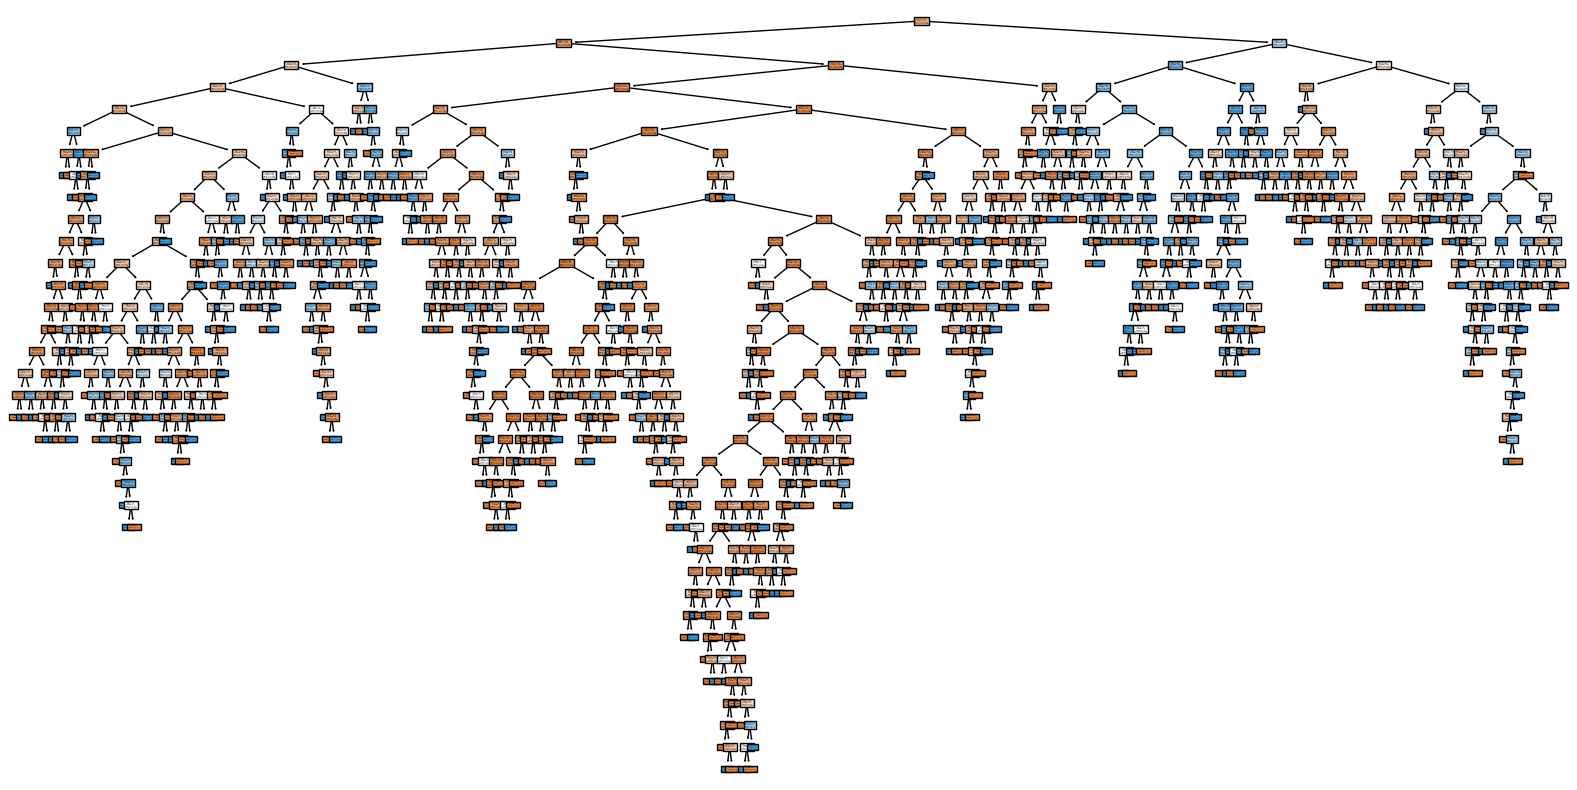

In [23]:

plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns.tolist(), class_names=['No Alcohol', 'Alcohol'])
plt.show()


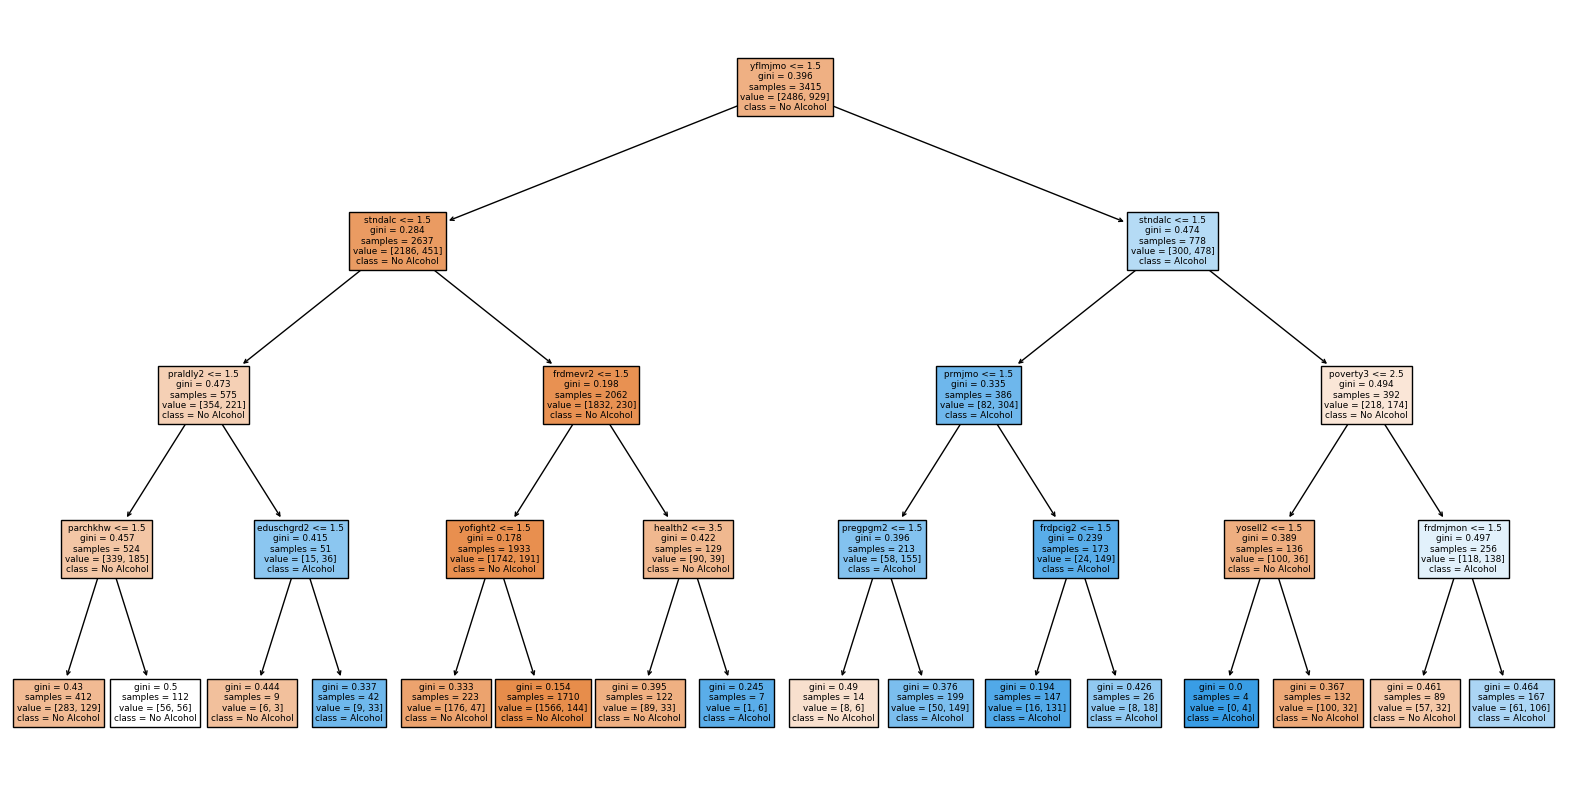

In [24]:
pruned_tree = DecisionTreeClassifier(max_depth=4)
pruned_tree.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(pruned_tree, filled=True, feature_names=X.columns.tolist(), class_names=['No Alcohol', 'Alcohol'])
plt.show()


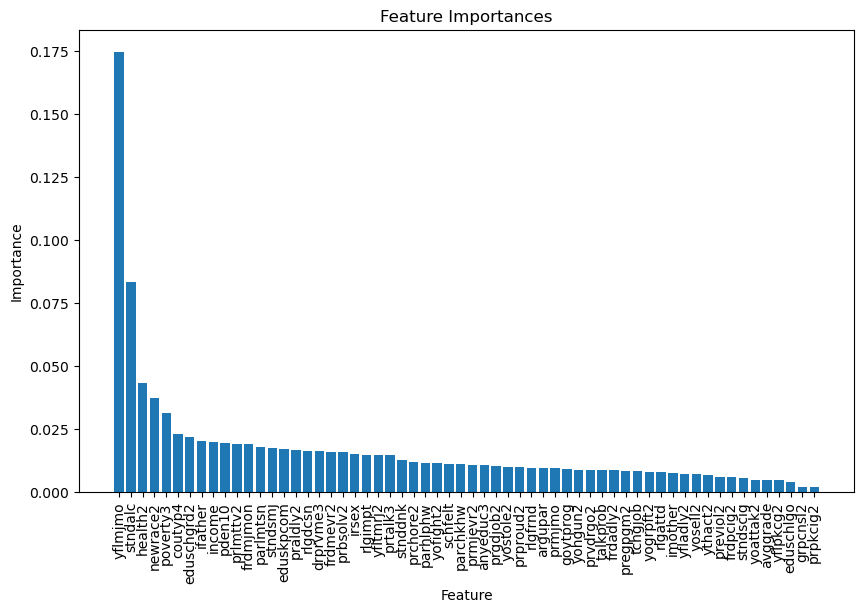

In [25]:
importances = tree_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

We will do it now using bagging

In [26]:
tree_model = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(tree_model, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [27]:
bagging_predict = bagging_classifier.predict(X_test)

In [28]:
accuracy_bagging = accuracy_score(y_test, bagging_predict)
print('Accuracy with bagging model:', accuracy_bagging)


Accuracy with bagging model: 0.7822014051522248


In [29]:
conf_matrix_bagging = confusion_matrix(y_test, bagging_predict)
print('Confusion Matrix:')
print(conf_matrix_bagging)

Confusion Matrix:
[[575  53]
 [133  93]]


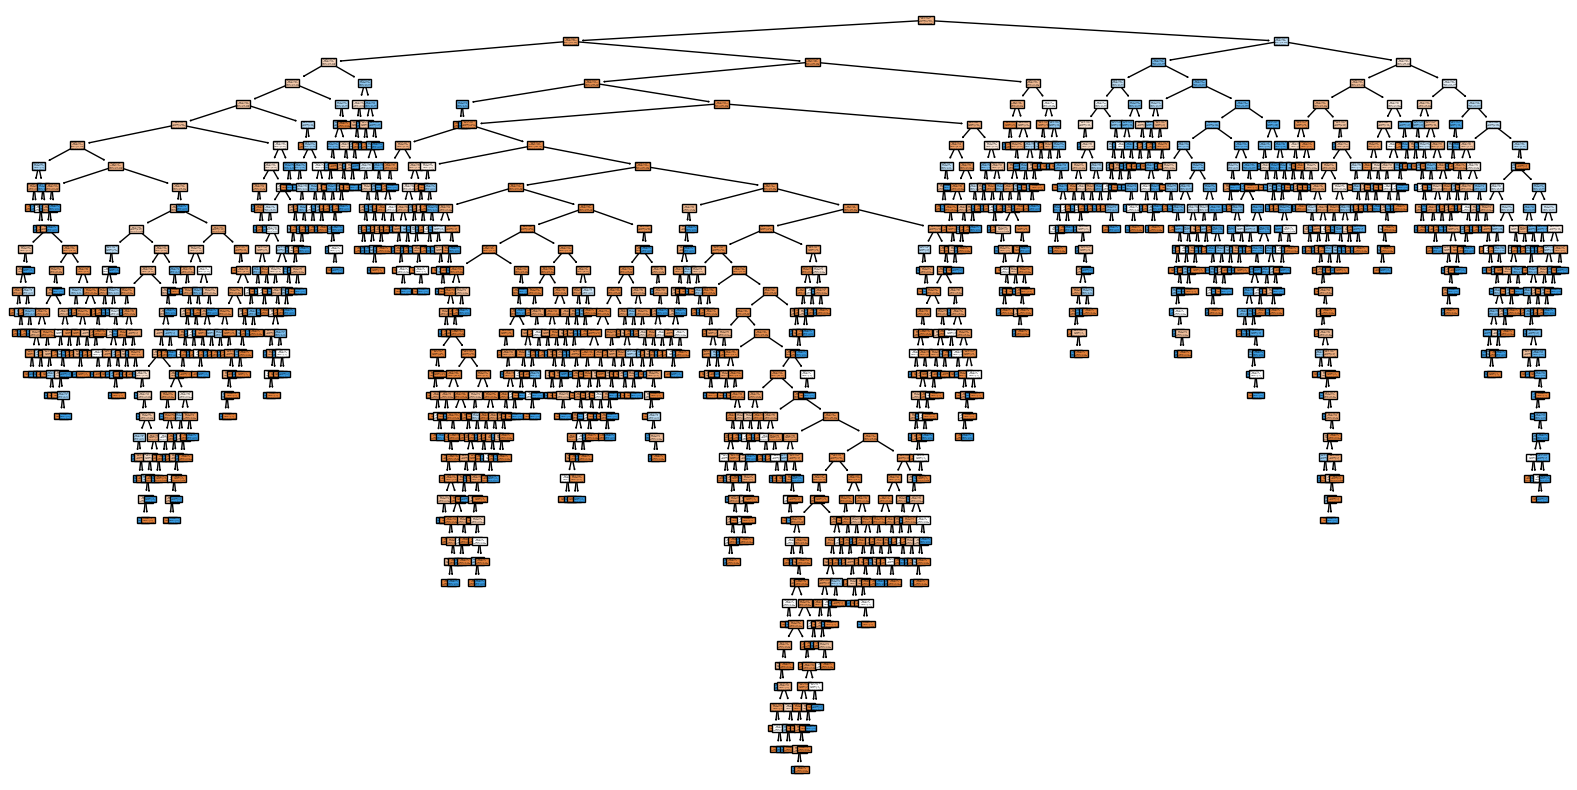

In [30]:


tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns.tolist(), class_names=['No Alcohol', 'Alcohol'])
plt.show()


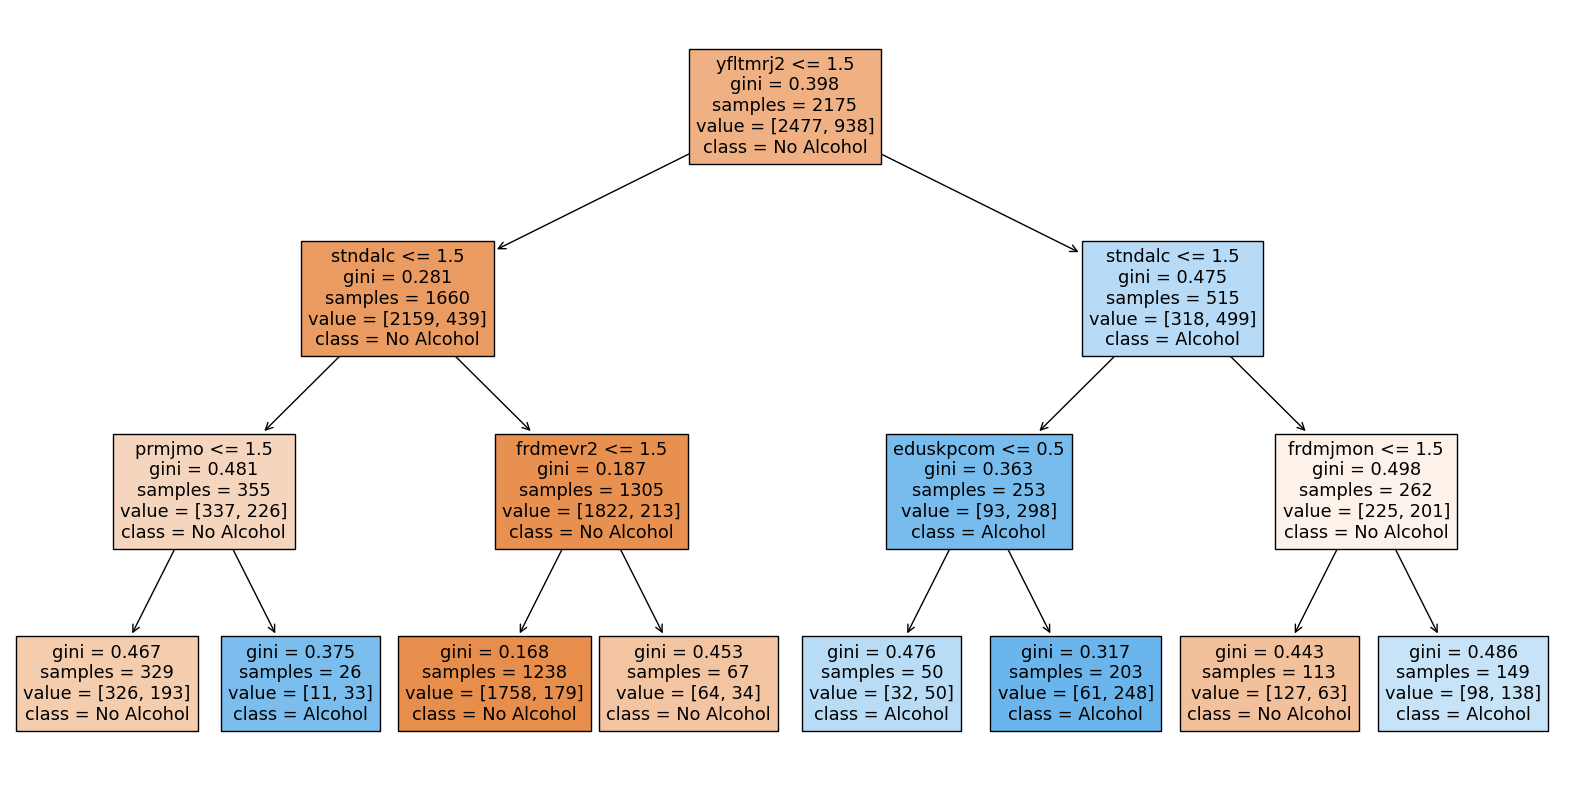

In [31]:
pruned_tree = DecisionTreeClassifier(max_depth=3)
classifier_pruned = BaggingClassifier(pruned_tree, n_estimators=10, random_state=42)
classifier_pruned.fit(X_train, y_train)
pruned_tree = classifier_pruned.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(pruned_tree, filled=True, feature_names=list(X.columns), class_names=['No Alcohol', 'Alcohol'])
plt.show()



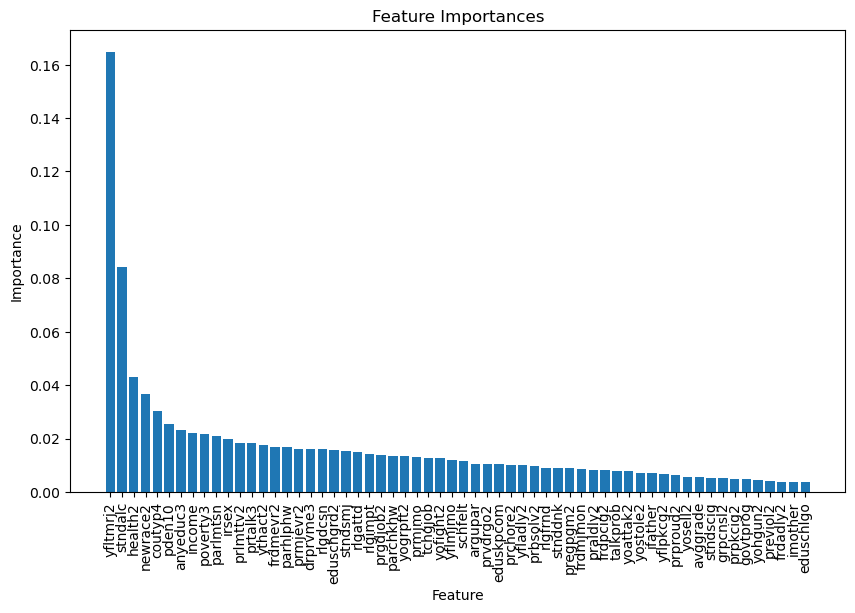

In [32]:
importances = tree_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

Lets continue the same using random forest

In [ ]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred_random_forest = random_forest_classifier.predict(X_test)


In [ ]:
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print('Accuracy (Random Forest):', accuracy_random_forest)


In [ ]:
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
print('Confusion Matrix (Random Forest):')
print(conf_matrix_random_forest)

In [ ]:
random_forest_pruned = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
random_forest_pruned.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(random_forest_pruned.estimators_[0], filled=True, feature_names=list(X.columns), class_names=['No Alcohol', 'Alcohol'])
plt.show()


In [ ]:
feature_importances = random_forest_classifier.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

Multiclass Classifier

For multiclass we will be using ALCMDAYS

RC-# OF DAYS USED ALCOHOL IN PAST MONTH</br>
Freq Pct</br>
1 = 1-2 Days (IRALCFM=1-2)</br>
2 = 3-5 Days (IRALCFM=3-5)</br>
3 = 6-19 Days (IRALCFM=6-19)</br>
4 = 20-30 Days (IRALCFM=20-30)</br>
5 = Non User or No Past Month Use (IRALCFM=91,93)</br>

Creating a new dataframe with required features.

In [ ]:

required_columns = ['alcmdays', 'schfelt', 'tchgjob', 'avggrade', 'stndscig', 'stndsmj',
           'stndalc', 'stnddnk', 'parchkhw', 'parhlphw', 'prchore2', 'prlmttv2',
           'parlmtsn', 'prgdjob2', 'prproud2', 'argupar', 'yofight2', 'yogrpft2',
           'yohgun2', 'yosell2', 'yostole2', 'yoattak2', 'prpkcig2', 'prmjevr2',
           'prmjmo', 'praldly2', 'yflpkcg2', 'yfltmrj2', 'yflmjmo', 'yfladly2',
           'frdpcig2', 'frdmevr2', 'frdmjmon', 'frdadly2', 'talkprob', 'prtalk3',
           'prbsolv2', 'previol2', 'prvdrgo2', 'grpcnsl2', 'pregpgm2', 'ythact2',
           'drprvme3', 'anyeduc3', 'rlgattd', 'rlgimpt', 'rlgdcsn', 'rlgfrnd',
           'irsex', 'newrace2', 'health2', 'eduschlgo', 'eduschgrd2', 'eduskpcom',
           'imother', 'ifather', 'income', 'govtprog', 'poverty3', 'pden10',
           'coutyp4']

dataframe_multilevel = youth_data[required_columns]

dataframe_multilevel.head(5)

In [ ]:
X = dataframe_multilevel.drop('alcmdays', axis=1) 
y = dataframe_multilevel['alcmdays']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
multi_classifier_tree = DecisionTreeClassifier()
multi_classifier_tree.fit(X_train, y_train)

multi_predictions = multi_classifier_tree.predict(X_test)

multi_accuracy = accuracy_score(y_test, multi_predictions)
print("Multi-level Decision Tree Accuracy:", multi_accuracy)

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(multi_classifier_tree, filled=True, feature_names=X.columns.tolist(), class_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.show()

In [ ]:

multi_classifier_pruned = DecisionTreeClassifier(max_depth=3) 
multi_classifier_pruned.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(multi_classifier_pruned, filled=True, feature_names=list(X.columns), class_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], rounded=True, fontsize=10)
plt.show()

In [ ]:
importances = multi_classifier_tree.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [ ]:
X = dataframe_multilevel.drop('alcmdays', axis=1) 
y = dataframe_multilevel['alcmdays']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred_random_forest = random_forest_classifier.predict(X_test)

In [ ]:
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print('Accuracy (Random Forest):', accuracy_random_forest)

In [ ]:
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
print('Confusion Matrix (Random Forest):')
print(conf_matrix_random_forest)

In [ ]:
random_forest_pruned = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
random_forest_pruned.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(random_forest_pruned.estimators_[0], filled=True, feature_names=list(X.columns), class_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.show()


In [ ]:
feature_importances = random_forest_classifier.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

Lets go ahead with regression models now, here we are selecting alcydays (Number of days a person has used alcohol in the past year) for accuracy

In [ ]:

required_columns = ['alcydays', 'schfelt', 'tchgjob', 'avggrade', 'stndscig', 'stndsmj',
           'stndalc', 'stnddnk', 'parchkhw', 'parhlphw', 'prchore2', 'prlmttv2',
           'parlmtsn', 'prgdjob2', 'prproud2', 'argupar', 'yofight2', 'yogrpft2',
           'yohgun2', 'yosell2', 'yostole2', 'yoattak2', 'prpkcig2', 'prmjevr2',
           'prmjmo', 'praldly2', 'yflpkcg2', 'yfltmrj2', 'yflmjmo', 'yfladly2',
           'frdpcig2', 'frdmevr2', 'frdmjmon', 'frdadly2', 'talkprob', 'prtalk3',
           'prbsolv2', 'previol2', 'prvdrgo2', 'grpcnsl2', 'pregpgm2', 'ythact2',
           'drprvme3', 'anyeduc3', 'rlgattd', 'rlgimpt', 'rlgdcsn', 'rlgfrnd',
           'irsex', 'newrace2', 'health2', 'eduschlgo', 'eduschgrd2', 'eduskpcom',
           'imother', 'ifather', 'income', 'govtprog', 'poverty3', 'pden10',
           'coutyp4']

dataframe_regression = youth_data[required_columns]

dataframe_regression.head(5)

In [ ]:
X = dataframe_regression.drop(columns=['alcydays'])
y = dataframe_regression['alcydays']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

dt_regressor = DecisionTreeRegressor(max_depth = 3, random_state=42)
dt_regressor.fit(X_train, y_train)

y_predict = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)

In [ ]:


plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=list(X.columns), rounded=True, fontsize=10)
plt.show()

In [ ]:
importances = dt_regressor.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [ ]:

X = dataframe_regression.drop(columns=['alcydays'])
y = dataframe_regression['alcydays']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)


In [ ]:
rf_predictions = rf_regressor.predict(X_test)
dt_mse = mean_squared_error(y_test, rf_predictions)
print(f"Decision Tree Regressor MSE: {dt_mse:.2f}")

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=list(X.columns), rounded=True, fontsize=10)
plt.show()

In [ ]:
importances = rf_regressor.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()